In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import norm
import random
import math

## Part 1: homoscedastic Gaussian distribution

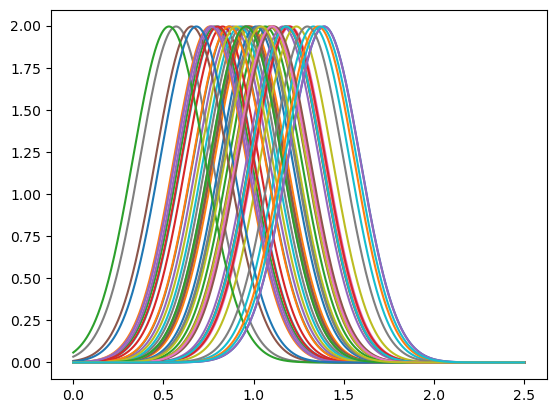

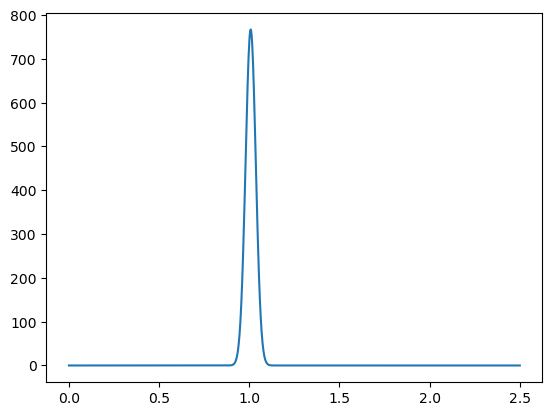

In [65]:
#fake mesuraments of N quasars distributed as a gaussian with known mu and sigma
mu = 1
sigma = 0.2
N = 1000
Nrand = 50
xi=np.random.normal(mu, sigma, Nrand)
x_plot = np.linspace(0, 2.5, N)
L = 1 #define the likelihood for the products of all the likelihoods for each xi

#define a gaussian distribution for each xi and then plots its likelihood
for i in xi:
    dist = norm(i, sigma)
    plt.plot(x_plot, dist.pdf(x_plot)) #singles likelihoods
    L *= dist.pdf(x_plot) #final likelihood as a product of all the singles likelihood

plt.show()
plt.plot(x_plot,L)

In [66]:
#comparison of the likelihood solution with de MLE estimator derived
maxL = np.max(L)
MLE = x_plot[np.where(L==maxL)]
print((MLE))
print(np.mean(xi))

[1.00850851]
1.0078878167788676


## Part 2 (errors)

numerical error on mu:  0.028284271247487395
analitical error on mu:  0.0282842712474619


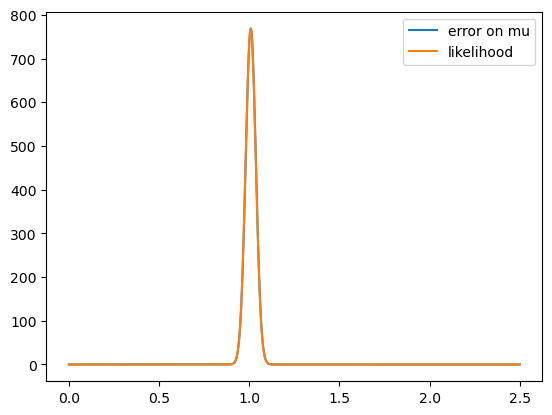

In [81]:
#rough 2nd order derivative with np.diff used recursively (or with n=2 ?)
L2diff = np.diff(np.log(L[L>0]), n=2)[0] / (np.diff(x_plot[L>0])**2)[0]
print('numerical error on mu: ', 1/(-L2diff)**(0.5))
print('analitical error on mu: ', sigma/(Nrand**0.5))

dist = norm(MLE,1/(-L2diff)**(0.5))
plt.plot(np.linspace(0, 2.5, N), dist.pdf(np.linspace(0, 2.5, N))*5.45*10, label='error on mu')
plt.plot(x_plot, L, label='likelihood')
plt.legend()

## Part 3: heteroscedastic Gaussian distribution

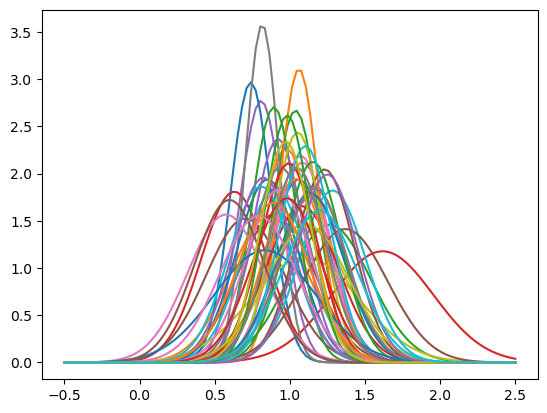

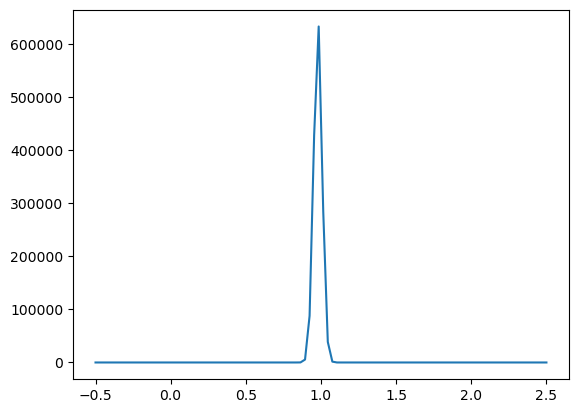

In [82]:
mu = 1
Nrand = 50
N = 100
sigma = np.random.normal(0.2, 0.05, Nrand)
xi=np.random.normal(mu, sigma, Nrand)
x_plot = np.linspace(-0.5, 2.5, N)
L = 1 #define the likelihood for the products of all the likelihoods for each xi

#define a gaussian distribution for each xi and then plots its likelihood
for i,j in zip(xi,sigma):
    dist = norm(i, j)
    plt.plot(x_plot, dist.pdf(x_plot)) #singles likelihoods
    L *= dist.pdf(x_plot) #final likelihood as a product of all the singles likelihood

plt.show()
plt.plot(x_plot,L)

In [86]:
#comparison of the likelihood solution with de MLE estimator derived
maxL = np.max(L)
MLE = x_plot[np.where(L==maxL)]
print((MLE))
print(np.sum(xi/sigma**2)/np.sum(sigma**-2))

[0.98484848]
0.9796394618244014


numerical error on mu:  0.02775287845781968
analitical error on mu:  0.027752878457818785


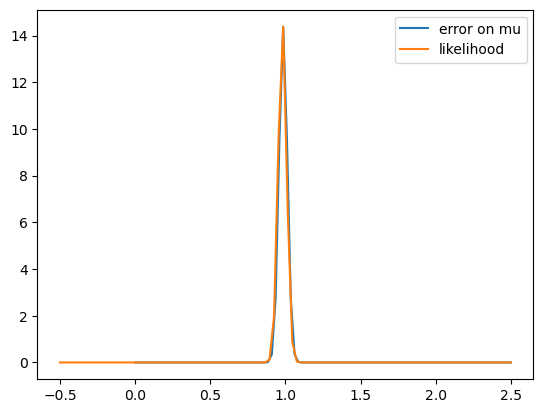

In [96]:
#rough 2nd order derivative with np.diff used recursively (or with n=2 ?)
L2diff = np.diff(np.log(L[L>0]), n=2)[0] / (np.diff(x_plot[L>0])**2)[0]
print('numerical error on mu: ', 1/(-L2diff)**(0.5))
print('analitical error on mu: ', np.sum(sigma**-2)**-0.5)

dist = norm(MLE,1/(-L2diff)**(0.5))
plt.plot(np.linspace(0, 2.5, N), dist.pdf(np.linspace(0, 2.5, N)), label='error on mu')
plt.plot(x_plot, L/(4.4*10**4), label='likelihood')
plt.legend()